# Introduction

In [1]:
# Load the   environment

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import os
import glob
from datetime import datetime

# Gather Data

In [2]:
# Read the .csv file

df1 = pd.read_csv('./Dataset/twitter-archive-enhanced-2.csv')

In [3]:
# Make directory if it doesn't already exist

folder_name = 'image_predictions-3.tsv'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Read the .tsv file from the internet into a pandas dataframe

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save TSV to file

with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [4]:
df2 = pd.read_csv('./Dataset/image-predictions-3.tsv', sep='\t', header=0)

In [5]:
# Read the Twitter API .py file 

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
571: 801854953262350336
Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 7985

Fail
854: 765371061932261376
Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 7599

Fail
1132: 728986383096946689
Fail
1133: 728760639972315136
Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165:

Fail
1406: 699323444782047232
Fail
1407: 699088579889332224
Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439:

Fail
1680: 682032003584274432
Fail
1681: 682003177596559360
Fail
1682: 681981167097122816
Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713:

Fail
1954: 673662677122719744
Fail
1955: 673656262056419329
Fail
1956: 673636718965334016
Fail
1957: 673612854080196609
Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987:

Fail
2228: 668268907921326080
Fail
2229: 668256321989451776
Fail
2230: 668248472370458624
Fail
2231: 668237644992782336
Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261:

In [6]:
# Read the resulting text file from the Twitter API

tweets = pd.read_json('./Dataset/tweet_json.txt', lines=True)

def unpack(x):
    for x in tweets:
        id = 'id'
        favorite_count = 'favorite_count'
        retweet_count = 'retweet_count'

        tweets.append({'id': id, 
                       'favorite_count': favorite_count,
                       'retweet_count': retweet_count
                     })
df3 = pd.DataFrame(tweets, columns = ['id', 'favorite_count', 'retweet_count'])

In [7]:
# The dataframe formed from tweet-json.txt

df3

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


# Access Data

In [8]:
# Create copy of each of the datasets

arc = df1.copy()

ip = df2.copy()

tweet = df3.copy()

In [9]:
# Calling the 'twitter-archive-enhanced-2.csv' dataframe

df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [10]:
df1.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [11]:
# Calling the 'image-predictions-3.tsv' dataframe

df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [12]:
# Calling the 'tweet-json.txt' dataframe

df3

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


# Accessing Data section

## 8 Quality issues

1. Drop the 'tweet_id' column in the new dataset.
2. Removal of rows named 'False' values from the 'p1_dog', 'p2_dog', and 'p3_dog' columns.
3. Convert the 'timestamp' column into its appropriate datatype.
4. Remove created 'index' and 'timestamp' columns after resetting index and extracting texts from the timestamp.
5. Remove or replace null values.
6. Remove Duplicates.
7. Remove rows with invalid names like 'none', and 'a'. 
8. Fixed the datatype issue of in the merged dataframe. 


## 3 Tidiness issue

1. Remove non-essential columns across the dataframe.
2. Rename the 'tweet_id' to be the same across all dataframes.
3. Merged the various dog stages present in the 'twitter-archive' dataset.
4. Merge the dataframes to form a new one.

# NOTE:

## In other to be able to successfully carry out the data quality issues raised above, the Tidiness issues had to be addressed first, so as to avoid repetition of the same process across the three(3) different dataframes.

# Clean Data

In [13]:
# Merged 'twitter-archive-enhanced-2.csv' and 'image-predictions-3.tsv' together.

merged = df1.merge(df2, on='tweet_id', how='left')

In [14]:
# Call out the merged dataframes

merged

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [15]:
# Check for the column names in the new dataframe 

merged.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

# Tidy Issue 1:

In [16]:
# Drop non-essential columns in the new dataframe

merged.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'text', 'retweeted_status_id', 
             'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'jpg_url', 'img_num'], axis=1, inplace=True)

In [17]:
# call out the result of the new dataframe after removing columns

merged

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,13,10,Phineas,None,None,None,None,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,13,10,Tilly,None,None,None,None,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,12,10,Archie,None,None,None,None,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,13,10,Darla,None,None,None,None,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,12,10,Franklin,None,None,None,None,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,5,10,None,None,None,None,None,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2352,666044226329800704,2015-11-16 00:04:52 +0000,6,10,a,None,None,None,None,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2353,666033412701032449,2015-11-15 23:21:54 +0000,9,10,a,None,None,None,None,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2354,666029285002620928,2015-11-15 23:05:30 +0000,7,10,a,None,None,None,None,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


# Tidy Issue 2:

In [18]:
# Rename the column to be used to merge on with 'tweet-json.txt' dataframe

merged.rename(columns={'tweet_id':'id'}, inplace=True)

In [19]:
# Confirm that the renaming column worked

merged.columns

Index(['id', 'timestamp', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

# Tidy Issue 3:

In [20]:
# Merged the various dog stages present in the 'twitter-archive' dataset

merge = merged.melt(id_vars=["id", "timestamp", "rating_numerator", "rating_denominator", "name",
                            'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf','p2_dog', 'p3', 'p3_conf', 
                             'p3_dog'], var_name="dog stage", value_name="Value")

In [21]:
merge.head(3)

,id,timestamp,rating_numerator,rating_denominator,name,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog stage,Value
0,892420643555336193,2017-08-01 16:23:56 +0000,13,10,Phineas,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,doggo,None
1,892177421306343426,2017-08-01 00:17:27 +0000,13,10,Tilly,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,None
2,891815181378084864,2017-07-31 00:18:03 +0000,12,10,Archie,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,None


In [22]:
merge.columns

Index(['id', 'timestamp', 'rating_numerator', 'rating_denominator', 'name',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'dog stage', 'Value'],
      dtype='object')

# Tidy Issue 4:

In [23]:
# Merged all dataframes into one dataframe

twittermerged = merge.merge(df3, on='id', how='left')

In [24]:
# Call the newly formed dataframes

twittermerged

,id,timestamp,rating_numerator,rating_denominator,name,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog stage,Value,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,13,10,Phineas,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,doggo,None,39467.0,8853.0
1,892177421306343426,2017-08-01 00:17:27 +0000,13,10,Tilly,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,None,33819.0,6514.0
2,891815181378084864,2017-07-31 00:18:03 +0000,12,10,Archie,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,None,25461.0,4328.0
3,891689557279858688,2017-07-30 15:58:51 +0000,13,10,Darla,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,doggo,None,42908.0,8964.0
4,891327558926688256,2017-07-29 16:00:24 +0000,12,10,Franklin,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,doggo,None,41048.0,9774.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9419,666049248165822465,2015-11-16 00:24:50 +0000,5,10,None,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,puppo,None,111.0,41.0
9420,666044226329800704,2015-11-16 00:04:52 +0000,6,10,a,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,puppo,None,311.0,147.0
9421,666033412701032449,2015-11-15 23:21:54 +0000,9,10,a,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,puppo,None,128.0,47.0
9422,666029285002620928,2015-11-15 23:05:30 +0000,7,10,a,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,puppo,None,132.0,48.0


In [25]:
twittermerged.head(3)

,id,timestamp,rating_numerator,rating_denominator,name,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog stage,Value,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,13,10,Phineas,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,doggo,None,39467.0,8853.0
1,892177421306343426,2017-08-01 00:17:27 +0000,13,10,Tilly,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,None,33819.0,6514.0
2,891815181378084864,2017-07-31 00:18:03 +0000,12,10,Archie,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,None,25461.0,4328.0


In [26]:
twittermerged.dtypes

id                      int64
timestamp              object
rating_numerator        int64
rating_denominator      int64
name                   object
p1                     object
p1_conf               float64
p1_dog                 object
p2                     object
p2_conf               float64
p2_dog                 object
p3                     object
p3_conf               float64
p3_dog                 object
dog stage              object
Value                  object
favorite_count        float64
retweet_count         float64
dtype: object

# ISSUE 1: 
#### Drop the 'tweet_id' column in the new dataset.

# DEFINE: 
#### The tweet_id column is of no use now, since every row can be accessed by the row index method.

In [27]:
# Drop 'tweet_id'

twittermerged.drop(['id'], axis=1, inplace=True)

# ISSUE 2: 
#### Removal of rows named 'False' values from the 'p1_dog', 'p2_dog', and 'p3_dog' columns.

# DEFINE: 
#### To remove none dog values in p1, p2 and p3 from the dataframe.

In [28]:
# Removal of rows named 'False' values from the 'p1_dog' column

df4 = twittermerged[twittermerged.p1_dog != False]

In [29]:
# print the dataframe

df4

,timestamp,rating_numerator,rating_denominator,name,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog stage,Value,favorite_count,retweet_count
1,2017-08-01 00:17:27 +0000,13,10,Tilly,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,None,33819.0,6514.0
2,2017-07-31 00:18:03 +0000,12,10,Archie,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,None,25461.0,4328.0
4,2017-07-29 16:00:24 +0000,12,10,Franklin,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,doggo,None,41048.0,9774.0
5,2017-07-29 00:08:17 +0000,13,10,None,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,doggo,None,20562.0,3261.0
6,2017-07-28 16:27:12 +0000,13,10,Jax,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,doggo,None,12041.0,2158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9419,2015-11-16 00:24:50 +0000,5,10,None,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,puppo,None,111.0,41.0
9420,2015-11-16 00:04:52 +0000,6,10,a,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,puppo,None,311.0,147.0
9421,2015-11-15 23:21:54 +0000,9,10,a,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,puppo,None,128.0,47.0
9422,2015-11-15 23:05:30 +0000,7,10,a,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,puppo,None,132.0,48.0


In [30]:
# Removal of rows named 'False' values from the 'p2_dog' column

df5 = df4[df4.p2_dog != False]

In [31]:
# print the dataframe

df5

,timestamp,rating_numerator,rating_denominator,name,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog stage,Value,favorite_count,retweet_count
1,2017-08-01 00:17:27 +0000,13,10,Tilly,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,None,33819.0,6514.0
2,2017-07-31 00:18:03 +0000,12,10,Archie,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,None,25461.0,4328.0
4,2017-07-29 16:00:24 +0000,12,10,Franklin,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,doggo,None,41048.0,9774.0
5,2017-07-29 00:08:17 +0000,13,10,None,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,doggo,None,20562.0,3261.0
6,2017-07-28 16:27:12 +0000,13,10,Jax,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,doggo,None,12041.0,2158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9419,2015-11-16 00:24:50 +0000,5,10,None,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,puppo,None,111.0,41.0
9420,2015-11-16 00:04:52 +0000,6,10,a,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,puppo,None,311.0,147.0
9421,2015-11-15 23:21:54 +0000,9,10,a,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,puppo,None,128.0,47.0
9422,2015-11-15 23:05:30 +0000,7,10,a,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,puppo,None,132.0,48.0


In [32]:
# Removal of rows named 'False' values from the 'p3_dog' column

df = df5[df5.p3_dog != False]

In [33]:
# print the dataframe

df

,timestamp,rating_numerator,rating_denominator,name,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog stage,Value,favorite_count,retweet_count
1,2017-08-01 00:17:27 +0000,13,10,Tilly,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,None,33819.0,6514.0
2,2017-07-31 00:18:03 +0000,12,10,Archie,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,None,25461.0,4328.0
4,2017-07-29 16:00:24 +0000,12,10,Franklin,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,doggo,None,41048.0,9774.0
7,2017-07-28 00:22:40 +0000,13,10,None,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,doggo,None,56848.0,16716.0
8,2017-07-27 16:25:51 +0000,13,10,Zoey,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,doggo,None,28226.0,4429.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9419,2015-11-16 00:24:50 +0000,5,10,None,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,puppo,None,111.0,41.0
9420,2015-11-16 00:04:52 +0000,6,10,a,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,puppo,None,311.0,147.0
9421,2015-11-15 23:21:54 +0000,9,10,a,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,puppo,None,128.0,47.0
9422,2015-11-15 23:05:30 +0000,7,10,a,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,puppo,None,132.0,48.0


In [34]:
# Reset index to provide the dataframe with an ordered index

df.reset_index(inplace=True)

In [35]:
# print the dataframe

df

,index,timestamp,rating_numerator,rating_denominator,name,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog stage,Value,favorite_count,retweet_count
0,1,2017-08-01 00:17:27 +0000,13,10,Tilly,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,None,33819.0,6514.0
1,2,2017-07-31 00:18:03 +0000,12,10,Archie,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,None,25461.0,4328.0
2,4,2017-07-29 16:00:24 +0000,12,10,Franklin,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,doggo,None,41048.0,9774.0
3,7,2017-07-28 00:22:40 +0000,13,10,None,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,doggo,None,56848.0,16716.0
4,8,2017-07-27 16:25:51 +0000,13,10,Zoey,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,doggo,None,28226.0,4429.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6091,9419,2015-11-16 00:24:50 +0000,5,10,None,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,puppo,None,111.0,41.0
6092,9420,2015-11-16 00:04:52 +0000,6,10,a,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,puppo,None,311.0,147.0
6093,9421,2015-11-15 23:21:54 +0000,9,10,a,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,puppo,None,128.0,47.0
6094,9422,2015-11-15 23:05:30 +0000,7,10,a,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,puppo,None,132.0,48.0


# ISSUE 3: 
#### Convert the 'timestamp' column from float to datetime dtype

# DEFINE: 
#### Ensure that the column has its proper datatype

In [36]:
# convert the timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

C:\Users\HP\AppData\Local\Temp\ipykernel_9288\3411375071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])


In [37]:
# extracting date from timestamp
df['Date'] = [datetime.date(d) for d in df['timestamp']] 

# add a column for Year
df['Year'] = df['timestamp'].dt.year

# add a column for Month
df['Month'] = df['timestamp'].dt.month

# add a column for Day
df['Day'] = df['timestamp'].dt.day

# print the new dataframe
df

C:\Users\HP\AppData\Local\Temp\ipykernel_9288\177950214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = [datetime.date(d) for d in df['timestamp']]
C:\Users\HP\AppData\Local\Temp\ipykernel_9288\177950214.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['timestamp'].dt.year
C:\Users\HP\AppData\Local\Temp\ipykernel_9288\177950214.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,index,timestamp,rating_numerator,rating_denominator,name,p1,p1_conf,p1_dog,p2,p2_conf,...,p3_conf,p3_dog,dog stage,Value,favorite_count,retweet_count,Date,Year,Month,Day
0,1,2017-08-01 00:17:27+00:00,13,10,Tilly,Chihuahua,0.323581,True,Pekinese,0.090647,...,0.068957,True,doggo,None,33819.0,6514.0,2017-08-01,2017,8,1
1,2,2017-07-31 00:18:03+00:00,12,10,Archie,Chihuahua,0.716012,True,malamute,0.078253,...,0.031379,True,doggo,None,25461.0,4328.0,2017-07-31,2017,7,31
2,4,2017-07-29 16:00:24+00:00,12,10,Franklin,basset,0.555712,True,English_springer,0.225770,...,0.175219,True,doggo,None,41048.0,9774.0,2017-07-29,2017,7,29
3,7,2017-07-28 00:22:40+00:00,13,10,None,Pomeranian,0.566142,True,Eskimo_dog,0.178406,...,0.076507,True,doggo,None,56848.0,16716.0,2017-07-28,2017,7,28
4,8,2017-07-27 16:25:51+00:00,13,10,Zoey,Irish_terrier,0.487574,True,Irish_setter,0.193054,...,0.118184,True,doggo,None,28226.0,4429.0,2017-07-27,2017,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6091,9419,2015-11-16 00:24:50+00:00,5,10,None,miniature_pinscher,0.560311,True,Rottweiler,0.243682,...,0.154629,True,puppo,None,111.0,41.0,2015-11-16,2015,11,16
6092,9420,2015-11-16 00:04:52+00:00,6,10,a,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,...,0.222752,True,puppo,None,311.0,147.0,2015-11-16,2015,11,16
6093,9421,2015-11-15 23:21:54+00:00,9,10,a,German_shepherd,0.596461,True,malinois,0.138584,...,0.116197,True,puppo,None,128.0,47.0,2015-11-15,2015,11,15
6094,9422,2015-11-15 23:05:30+00:00,7,10,a,redbone,0.506826,True,miniature_pinscher,0.074192,...,0.072010,True,puppo,None,132.0,48.0,2015-11-15,2015,11,15


# ISSUE 4: 
#### Remove created 'index' and 'timestamp' columns after resetting index and extracting texts from the timestamp

# DEFINE: 
#### Remove the created index column to have proper indexing, and the timestamp column

In [38]:
# Remove the created index column to have proper indexing, and the timestamp column

df.drop(['index', 'timestamp'], axis=1, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_9288\1093168134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['index', 'timestamp'], axis=1, inplace=True)


In [39]:
# print the dataframe

df

,rating_numerator,rating_denominator,name,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog stage,Value,favorite_count,retweet_count,Date,Year,Month,Day
0,13,10,Tilly,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,None,33819.0,6514.0,2017-08-01,2017,8,1
1,12,10,Archie,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,None,25461.0,4328.0,2017-07-31,2017,7,31
2,12,10,Franklin,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,doggo,None,41048.0,9774.0,2017-07-29,2017,7,29
3,13,10,None,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,doggo,None,56848.0,16716.0,2017-07-28,2017,7,28
4,13,10,Zoey,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,doggo,None,28226.0,4429.0,2017-07-27,2017,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6091,5,10,None,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,puppo,None,111.0,41.0,2015-11-16,2015,11,16
6092,6,10,a,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,puppo,None,311.0,147.0,2015-11-16,2015,11,16
6093,9,10,a,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,puppo,None,128.0,47.0,2015-11-15,2015,11,15
6094,7,10,a,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,puppo,None,132.0,48.0,2015-11-15,2015,11,15


In [40]:
# Check for information contained in the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6096 entries, 0 to 6095
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rating_numerator    6096 non-null   int64  
 1   rating_denominator  6096 non-null   int64  
 2   name                6096 non-null   object 
 3   p1                  4972 non-null   object 
 4   p1_conf             4972 non-null   float64
 5   p1_dog              4972 non-null   object 
 6   p2                  4972 non-null   object 
 7   p2_conf             4972 non-null   float64
 8   p2_dog              4972 non-null   object 
 9   p3                  4972 non-null   object 
 10  p3_conf             4972 non-null   float64
 11  p3_dog              4972 non-null   object 
 12  dog stage           6096 non-null   object 
 13  Value               6096 non-null   object 
 14  favorite_count      6092 non-null   float64
 15  retweet_count       6092 non-null   float64
 16  Date  

In [41]:
# Check for each datatypes of columns in the dataframe

df.dtypes

rating_numerator        int64
rating_denominator      int64
name                   object
p1                     object
p1_conf               float64
p1_dog                 object
p2                     object
p2_conf               float64
p2_dog                 object
p3                     object
p3_conf               float64
p3_dog                 object
dog stage              object
Value                  object
favorite_count        float64
retweet_count         float64
Date                   object
Year                    int64
Month                   int64
Day                     int64
dtype: object

In [42]:
# Check for empty cell

df.isnull().sum()

rating_numerator         0
rating_denominator       0
name                     0
p1                    1124
p1_conf               1124
p1_dog                1124
p2                    1124
p2_conf               1124
p2_dog                1124
p3                    1124
p3_conf               1124
p3_dog                1124
dog stage                0
Value                    0
favorite_count           4
retweet_count            4
Date                     0
Year                     0
Month                    0
Day                      0
dtype: int64

# ISSUE 5: 
#### Remove or replace null values.

# DEFINE: 
#### To get rid of empty cells in the dataframe

In [43]:
# Remove null values across the dataframes

df.dropna(how='any',axis=0, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_9288\1509138923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(how='any',axis=0, inplace=True)


In [44]:
# Print the dataframe

df

,rating_numerator,rating_denominator,name,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog stage,Value,favorite_count,retweet_count,Date,Year,Month,Day
0,13,10,Tilly,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,None,33819.0,6514.0,2017-08-01,2017,8,1
1,12,10,Archie,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,None,25461.0,4328.0,2017-07-31,2017,7,31
2,12,10,Franklin,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,doggo,None,41048.0,9774.0,2017-07-29,2017,7,29
3,13,10,None,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,doggo,None,56848.0,16716.0,2017-07-28,2017,7,28
4,13,10,Zoey,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,doggo,None,28226.0,4429.0,2017-07-27,2017,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6091,5,10,None,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,puppo,None,111.0,41.0,2015-11-16,2015,11,16
6092,6,10,a,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,puppo,None,311.0,147.0,2015-11-16,2015,11,16
6093,9,10,a,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,puppo,None,128.0,47.0,2015-11-15,2015,11,15
6094,7,10,a,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,puppo,None,132.0,48.0,2015-11-15,2015,11,15


# ISSUE 6: 
#### Remove Duplicates.

# DEFINE: 
#### To get rid of duplicated values in the dataframe

In [45]:
# Drop Duplicates

df.drop_duplicates (subset = None, keep = 'first', inplace = True, ignore_index = False)

C:\Users\HP\AppData\Local\Temp\ipykernel_9288\2898030637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates (subset = None, keep = 'first', inplace = True, ignore_index = False)


In [46]:
# Read the dataframe after carrying out data quality and tidiness issues

df

,rating_numerator,rating_denominator,name,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog stage,Value,favorite_count,retweet_count,Date,Year,Month,Day
0,13,10,Tilly,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,None,33819.0,6514.0,2017-08-01,2017,8,1
1,12,10,Archie,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,None,25461.0,4328.0,2017-07-31,2017,7,31
2,12,10,Franklin,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,doggo,None,41048.0,9774.0,2017-07-29,2017,7,29
3,13,10,None,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,doggo,None,56848.0,16716.0,2017-07-28,2017,7,28
4,13,10,Zoey,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,doggo,None,28226.0,4429.0,2017-07-27,2017,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6091,5,10,None,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,puppo,None,111.0,41.0,2015-11-16,2015,11,16
6092,6,10,a,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,puppo,None,311.0,147.0,2015-11-16,2015,11,16
6093,9,10,a,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,puppo,None,128.0,47.0,2015-11-15,2015,11,15
6094,7,10,a,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,puppo,None,132.0,48.0,2015-11-15,2015,11,15


# ISSUE 7: 
#### Remove rows with invalid names like 'none', and 'a'.

# DEFINE: 
#### To ensure the integrity of the data in the 'name' column.

In [47]:
DF = df[df.name != 'a']

In [48]:
DD = DF[DF.name != 'None']

In [49]:
DD

,rating_numerator,rating_denominator,name,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog stage,Value,favorite_count,retweet_count,Date,Year,Month,Day
0,13,10,Tilly,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,None,33819.0,6514.0,2017-08-01,2017,8,1
1,12,10,Archie,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,None,25461.0,4328.0,2017-07-31,2017,7,31
2,12,10,Franklin,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,doggo,None,41048.0,9774.0,2017-07-29,2017,7,29
4,13,10,Zoey,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,doggo,None,28226.0,4429.0,2017-07-27,2017,7,27
5,14,10,Cassie,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo,doggo,32467.0,7711.0,2017-07-26,2017,7,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6070,9,10,Scout,curly-coated_retriever,0.322084,True,giant_schnauzer,0.287955,True,Labrador_retriever,0.166331,True,puppo,None,107.0,23.0,2015-11-17,2015,11,17
6074,10,10,Walter,toy_terrier,0.149680,True,papillon,0.148258,True,Chihuahua,0.142860,True,puppo,None,129.0,48.0,2015-11-17,2015,11,17
6080,1,2,an,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,puppo,None,152.0,71.0,2015-11-16,2015,11,16
6088,10,10,the,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True,puppo,None,496.0,232.0,2015-11-16,2015,11,16


# ISSUE 8: 
#### Fix the datatype issue of in the merged dataframe.

# DEFINE: 
#### To ensure that all columns present in the data set are in their proper datatypes.

In [50]:
# Change the datatype to the appropriate one

DD['Date'] = pd.to_datetime(DD['Date'].astype(str), dayfirst=True, errors='coerce')

C:\Users\HP\AppData\Local\Temp\ipykernel_9288\1479238635.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DD['Date'] = pd.to_datetime(DD['Date'].astype(str), dayfirst=True, errors='coerce')


In [51]:
# Confirm the change

DD.dtypes

rating_numerator               int64
rating_denominator             int64
name                          object
p1                            object
p1_conf                      float64
p1_dog                        object
p2                            object
p2_conf                      float64
p2_dog                        object
p3                            object
p3_conf                      float64
p3_dog                        object
dog stage                     object
Value                         object
favorite_count               float64
retweet_count                float64
Date                  datetime64[ns]
Year                           int64
Month                          int64
Day                            int64
dtype: object

In [52]:
# Reset index to provide the dataframe with an ordered index

DD.reset_index(inplace=True)

In [53]:
# Remove the created index column to have proper indexing, and the timestamp column

DD.drop(['index', 'Value'], axis=1, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_9288\2722886039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DD.drop(['index', 'Value'], axis=1, inplace=True)


In [54]:
DD

,rating_numerator,rating_denominator,name,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog stage,favorite_count,retweet_count,Date,Year,Month,Day
0,13,10,Tilly,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,33819.0,6514.0,2017-08-01,2017,8,1
1,12,10,Archie,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,25461.0,4328.0,2017-07-31,2017,7,31
2,12,10,Franklin,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,doggo,41048.0,9774.0,2017-07-29,2017,7,29
3,13,10,Zoey,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,doggo,28226.0,4429.0,2017-07-27,2017,7,27
4,14,10,Cassie,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo,32467.0,7711.0,2017-07-26,2017,7,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3599,9,10,Scout,curly-coated_retriever,0.322084,True,giant_schnauzer,0.287955,True,Labrador_retriever,0.166331,True,puppo,107.0,23.0,2015-11-17,2015,11,17
3600,10,10,Walter,toy_terrier,0.149680,True,papillon,0.148258,True,Chihuahua,0.142860,True,puppo,129.0,48.0,2015-11-17,2015,11,17
3601,1,2,an,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,puppo,152.0,71.0,2015-11-16,2015,11,16
3602,10,10,the,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True,puppo,496.0,232.0,2015-11-16,2015,11,16


# Store the cleaned dataset

In [55]:
# write the new dataframe to a csv file and save it

DD.to_csv('twitter_archive_master.csv', index=False) 

# Analyze and visualize the cleaned dataset

# Insights

1. 2017 has the highest retweet count.
2. 2017 also has the highest record of favorite tweet.
3. The new dataset contains only informations related to dogs.

In [56]:
# creating a correlation matrix for the dataframe

corr = DD.corr()
corr

,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count,Year,Month,Day
rating_numerator,1.000000,0.590063,0.064873,0.047518,0.064249,0.327502,0.257024,0.436480,-0.160202,-0.039541
rating_denominator,0.590063,1.000000,-0.037485,0.063156,0.135248,-0.012835,-0.014131,0.010199,-0.033105,-0.048494
p1_conf,0.064873,-0.037485,1.000000,-0.611047,-0.757660,0.101229,0.052263,0.070083,0.011444,-0.010805
p2_conf,0.047518,0.063156,-0.611047,1.000000,0.501682,-0.030268,-0.021080,0.017041,0.005331,0.020507
p3_conf,0.064249,0.135248,-0.757660,0.501682,1.000000,-0.059966,-0.032033,-0.029846,0.011279,0.028451
favorite_count,0.327502,-0.012835,0.101229,-0.030268,-0.059966,1.000000,0.768962,0.555427,-0.133438,0.011738
retweet_count,0.257024,-0.014131,0.052263,-0.021080,-0.032033,0.768962,1.000000,0.375071,-0.089833,-0.023572
Year,0.436480,0.010199,0.070083,0.017041,-0.029846,0.555427,0.375071,1.000000,-0.676262,-0.112825
Month,-0.160202,-0.033105,0.011444,0.005331,0.011279,-0.133438,-0.089833,-0.676262,1.000000,0.133449
Day,-0.039541,-0.048494,-0.010805,0.020507,0.028451,0.011738,-0.023572,-0.112825,0.133449,1.000000


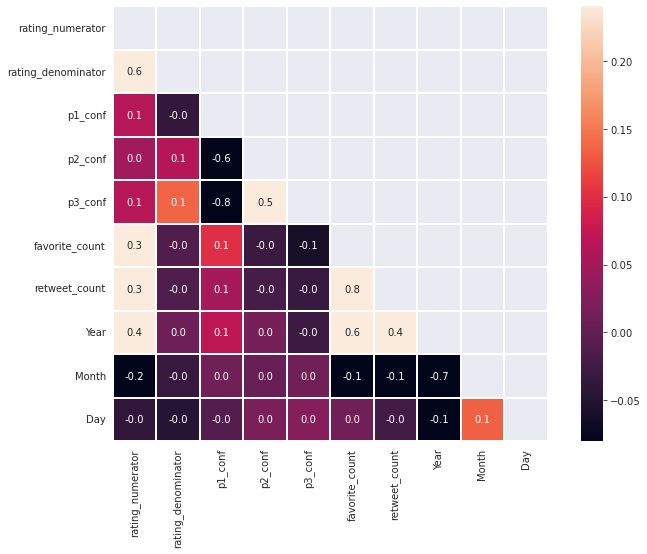

In [57]:
# plotting the correlation matrix using seaborn's heatmap to see the relationship between columns in the 'df'

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):
    fig = plt.subplots(figsize = (12,8))
    fig = sns.heatmap(corr, vmin = -0.08, vmax = .24, square = True, annot = True, linewidths = .08, fmt = ".1f", mask=mask)

[Text(0.5, 1.0, 'Retweet Count Yearly Distribution')]

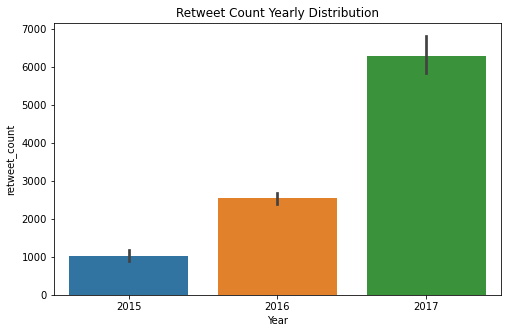

In [58]:
# To know the year with the highest record of 'retweet_count'

plt.figure(figsize=(8,5))
sns.barplot(y='retweet_count', x='Year', data=DD).set(title='Retweet Count Yearly Distribution')

[Text(0.5, 1.0, 'Favorite Count Yearly Distribution')]

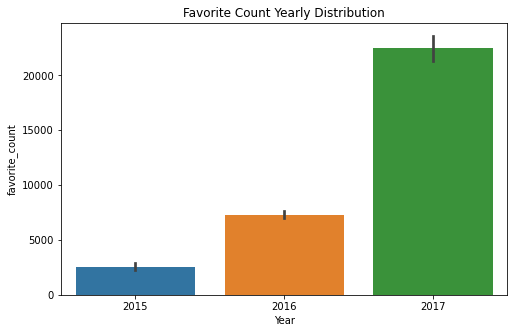

In [59]:
# To know the year with the highest record of 'favorite_count'

plt.figure(figsize=(8,5))
sns.barplot(y='favorite_count', x='Year', data=DD).set(title='Favorite Count Yearly Distribution')

[Text(0.5, 1.0, 'Retweet Count Date Distribution')]

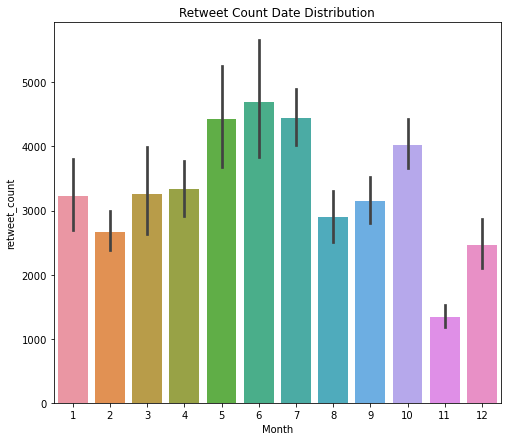

In [60]:
# To know the month when most of the retweet occurs

plt.figure(figsize=(8,7))
sns.barplot(y='retweet_count', x='Month', data=DD).set(title='Retweet Count Date Distribution')

[Text(0.5, 1.0, 'favorite_count Date Distribution')]

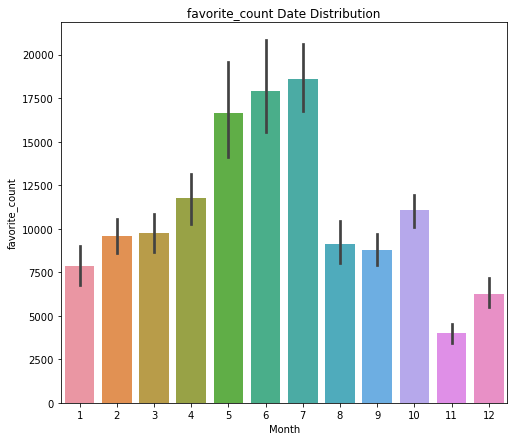

In [61]:
# To know the month that most of the tweets were favorited 

plt.figure(figsize=(8,7))
sns.barplot(y='favorite_count', x='Month', data=DD).set(title='favorite_count Date Distribution')

In [62]:
# convert the data into long format

df_cat = pd.melt(df, id_vars=['Year'], value_vars=['name',  'p1'])
df_cat

,Year,variable,value
0,2017,name,Tilly
1,2017,name,Archie
2,2017,name,Franklin
3,2017,name,None
4,2017,name,Zoey
...,...,...,...
9931,2015,p1,miniature_pinscher
9932,2015,p1,Rhodesian_ridgeback
9933,2015,p1,German_shepherd
9934,2015,p1,redbone


In [63]:
# Add a total column so that it can give the total of the values

df_cat['total']=1
df_cat

,Year,variable,value,total
0,2017,name,Tilly,1
1,2017,name,Archie,1
2,2017,name,Franklin,1
3,2017,name,None,1
4,2017,name,Zoey,1
...,...,...,...,...
9931,2015,p1,miniature_pinscher,1
9932,2015,p1,Rhodesian_ridgeback,1
9933,2015,p1,German_shepherd,1
9934,2015,p1,redbone,1


In [64]:
# Use the groupby function to group the categorical dataframe based on its columns

df_cat = df_cat.groupby(['Year', 'variable', 'value'], as_index=False).sum()
df_cat

,Year,variable,value,total
0,2015,name,Acro,4
1,2015,name,Aiden,4
2,2015,name,Albert,4
3,2015,name,Alfie,4
4,2015,name,Alice,4
...,...,...,...,...
1028,2017,p1,schipperke,4
1029,2017,p1,standard_poodle,8
1030,2017,p1,toy_poodle,4
1031,2017,p1,vizsla,8


[Text(0.5, 1.0, 'Categorical Count of p1')]

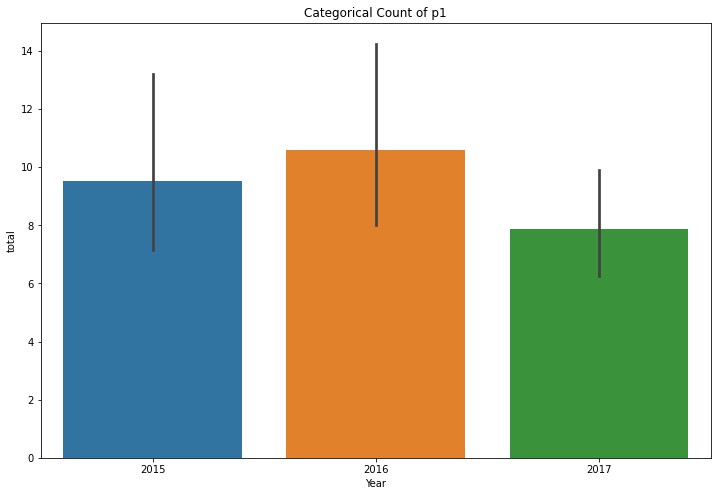

In [65]:
# Visualising the result of the categorical data

plt.figure(figsize=(12,8))
sns.barplot(x='Year', y='total', data=df_cat).set(title='Categorical Count of p1')